In [1]:
%matplotlib nbagg
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from simulator import Simulator

In [2]:
modes = ["coop", "unaware", "aware"]
num_robots = [2, 4, 6, 8, 10]
no_noise_output = [ [ [] for m in modes] for n in num_robots]

# No noise, full visibility
start = time.time()
for i in range(len(num_robots)):
    start = time.time()
    for mode in range(len(modes)):
        sim = Simulator(num_robots[i])
        steps, collisions = sim.run(mode=modes[mode])
        no_noise_output[i][mode].append((steps, collisions))
    end = time.time()
    print(end - start)

0.035003900528
0.177839040756
0.559425115585
1.61112689972
2.7794880867
[[[(50, 0)], [(51, 2)], [(51, 0)]], [[(51, 0)], [(53, 4)], [(53, 2)]], [[(52, 0)], [(53, 0)], [(53, 0)]], [[(53, 0)], [(55, 0)], [(55, 0)]], [[(55, 0)], [(60, 18)], [(61, 24)]]]


In [3]:
modes = ["coop", "unaware", "aware"]
noise_values = [0.0, 0.01, 0.03, 0.05]
num_robots_for_noise = [2, 4, 6, 8, 10]
noise_output = [ [ [ [] for m in modes] for n in num_robots_for_noise] for n in noise_values ]
for repetition in range(50):
    start = time.time()
    for n in range(len(noise_values)):
        for i in range(len(num_robots_for_noise)):
            for mode in range(len(modes)):
                sim = Simulator(num_robots_for_noise[i])
                steps, collisions = sim.run(mode=modes[mode], current_noise=noise_values[n])
                noise_output[n][i][mode].append((steps, collisions))
    end = time.time()
    print("Step %d done, took %f" % (repetition, (end-start)) )
    

Step 0 done, took 19.978663
Step 1 done, took 20.449498
Step 2 done, took 19.659494
Step 3 done, took 27.916965
Step 4 done, took 18.606056
Step 5 done, took 19.619510
Step 6 done, took 18.723444
Step 7 done, took 18.739952
Step 8 done, took 18.849551
Step 9 done, took 18.969316
Step 10 done, took 19.606119
Step 11 done, took 18.865640
Step 12 done, took 19.427729
Step 13 done, took 20.780549
Step 14 done, took 20.116562
Step 15 done, took 18.750794
Step 16 done, took 19.068306
Step 17 done, took 20.460607
Step 18 done, took 18.564820
Step 19 done, took 18.890631
Step 20 done, took 18.735292
Step 21 done, took 18.814532
Step 22 done, took 18.125569
Step 23 done, took 18.288092
Step 24 done, took 18.444434
Step 25 done, took 18.267954
Step 26 done, took 18.593667
Step 27 done, took 20.050888
Step 28 done, took 18.668548
Step 29 done, took 18.471910
Step 30 done, took 18.623727
Step 31 done, took 18.327477
Step 32 done, took 19.801537
Step 33 done, took 18.280378
Step 34 done, took 19.33

In [4]:
for n in range(len(noise_values)):
    for i in range(len(num_robots_for_noise)):
        for m in range(len(modes)):
            val = noise_output[n][i][m]
            minima = np.amin(val, axis=0)[0]
            med = np.median(val, axis=0)[0]
            maxima = np.amax(val, axis=0)[0]
            #print("Noise: " + str(noise_values[n]),num_robots_for_noise[i],modes[m],noise_output[n][i][m])
            #print(minima, med, maxima)

<IPython.core.display.Javascript object>


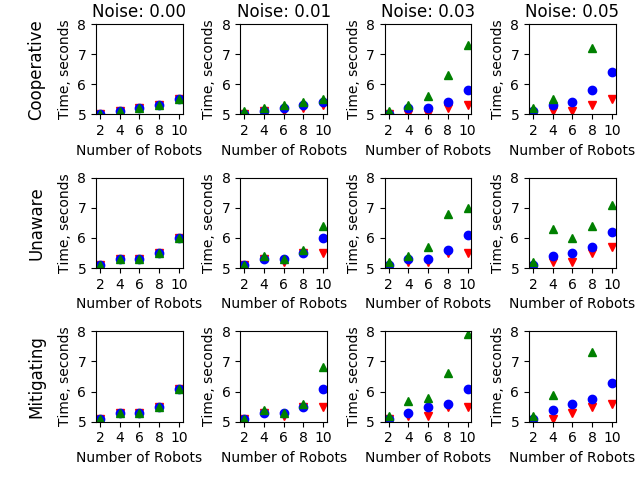

In [29]:
noise_values = [0.0, 0.01, 0.03, 0.05]
# Plot of min, median and max time taken to get to the goal, 
# divided up by noise in the system and mode of operation of the robots
fig, axes = plt.subplots(3,4)
outsideY = ["Cooperative", "Unaware", "Mitigating"]
outsideX = ["Noise: %.2f" % n for n in noise_values ]
pad = 5 # in points
for ax, col in zip(axes[0], outsideX):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

for ax, row in zip(axes[:,0], outsideY):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center', rotation='vertical')
plt.setp(axes.flat, xlabel='Number of Robots', ylabel='Time, seconds')
for n in range(len(noise_values)):
    for m in range(len(modes)):
        mine = [[] for i in num_robots_for_noise]
        med = [[] for i in num_robots_for_noise]
        maxe = [[] for i in num_robots_for_noise]
        for i in range(len(num_robots_for_noise)):
            val = noise_output[n][i][m]
            mine[i].append(np.amin(val, axis=0)[0] / 10.0)
            med[i].append(np.median(val, axis=0)[0] / 10.0)
            maxe[i].append(np.amax(val, axis=0)[0] / 10.0)
        axes[m][n].set_xticks(num_robots_for_noise)
        axes[m][n].set_ylim([5.0,8.0])
        axes[m][n].plot(num_robots_for_noise, mine, 'rv', num_robots_for_noise, med, 'bo', num_robots_for_noise, maxe, 'g^')
        
fig.tight_layout()
fig.subplots_adjust(left=0.15, top=0.95)
fig.savefig('times_to_num_robots_over_modes_and_noise.eps', bbox_inches='tight',  format='eps', dpi=300)
plt.show()

In [6]:
# Collisions against number of robots, with malicious, aware-oracle and aware-history subplots
noise_values_collision = [0.0, 0.01, 0.03, 0.05]
num_robots_for_collision = [2, 4, 6, 8, 10]
collision_modes = ["coop", "unaware", "aware-oracle"]
collision_output = [ [ [ [] for m in collision_modes] for n in num_robots_for_collision ] for n in noise_values_collision ]
for repetition in range(50):
    start = time.time()
    for n in range(len(noise_values_collision)):
        for i in range(len(num_robots_for_collision)):
            for mode in range(len(collision_modes)):
                sim = Simulator(num_robots_for_collision[i])
                if collision_modes[mode] == "coop":
                    steps, collisions = sim.run(mode="coop", current_noise=noise_values_collision[n])
                elif collision_modes[mode] == "unaware":
                    steps, collisions = sim.run(mode="unaware", current_noise=noise_values_collision[n] )
                else:
                    steps, collisions = sim.run(mode="aware", current_noise=noise_values_collision[n], identifier="oracle")
                collision_output[n][i][mode].append((steps,collisions))
    end = time.time()
    print("Step %d done, took %f" % (repetition, (end-start)) )

Step 0 done, took 19.437494
Step 1 done, took 23.119263
Step 2 done, took 25.557937
Step 3 done, took 21.708963
Step 4 done, took 21.776151
Step 5 done, took 20.896433
Step 6 done, took 20.753861
Step 7 done, took 19.809645
Step 8 done, took 19.709613
Step 9 done, took 19.561323
Step 10 done, took 21.368638
Step 11 done, took 22.193081
Step 12 done, took 21.589110
Step 13 done, took 21.708277
Step 14 done, took 21.192512
Step 15 done, took 21.077074
Step 16 done, took 20.610754
Step 17 done, took 20.707954
Step 18 done, took 20.636005
Step 19 done, took 20.936117
Step 20 done, took 20.776897
Step 21 done, took 22.977588
Step 22 done, took 24.445238
Step 23 done, took 21.243228
Step 24 done, took 20.279852
Step 25 done, took 21.132320
Step 26 done, took 20.051234
Step 27 done, took 20.281479
Step 28 done, took 20.297836
Step 29 done, took 19.882548
Step 30 done, took 20.073355
Step 31 done, took 22.173390
Step 32 done, took 20.457828
Step 33 done, took 20.754322
Step 34 done, took 21.28

<IPython.core.display.Javascript object>


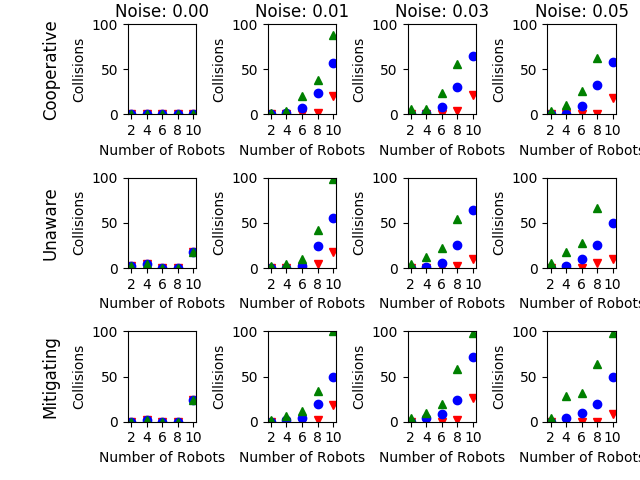

In [30]:
# Plot of min, median and max time taken to get to the goal, 
# divided up by noise in the system and mode of operation of the robots
fig, axes = plt.subplots(3,4)
outsideY = ["Cooperative", "Unaware", "Mitigating"]
outsideX = ["Noise: %.2f" % n for n in noise_values_collision ]
pad = 5 # in points
for ax, col in zip(axes[0], outsideX):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

for ax, row in zip(axes[:,0], outsideY):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center', rotation='vertical')
plt.setp(axes.flat, xlabel='Number of Robots', ylabel='Collisions')
# Data
for n in range(len(noise_values_collision)):
    for m in range(len(collision_modes)):
        mine = [[] for i in num_robots_for_collision]
        med = [[] for i in num_robots_for_collision]
        maxe = [[] for i in num_robots_for_collision]
        for i in range(len(num_robots_for_collision)):
            val = collision_output[n][i][m]
            mine[i].append(np.amin(val, axis=0)[1])
            med[i].append(np.median(val, axis=0)[1])
            maxe[i].append(np.amax(val, axis=0)[1])
        axes[m][n].set_xticks(num_robots_for_collision)
        axes[m][n].set_ylim([0.0,100.0])
        axes[m][n].plot(num_robots_for_collision, mine, 'rv', num_robots_for_collision, med, 'bo', num_robots_for_collision, maxe, 'g^')
fig.tight_layout()
# tight_layout doesn't take these labels into account. We'll need 
# to make some room. These numbers are are manually tweaked. 
# You could automatically calculate them, but it's a pain.
fig.subplots_adjust(left=0.2, top=0.95)
fig.savefig('collisions_to_num_robots_over_modes_and_noise.eps', bbox_inches='tight',  format='eps', dpi=300)
plt.show()

In [8]:
# Collisions against visibility range, with 4 robots, aware with oracle access
noise_values_visibility = [0.0, 0.01, 0.03, 0.05]
visibility = [10.0, 8.0, 5.0, 4.0, 3.0, 2.0 ]
visibility_output = [ [ [] for n in visibility ] for n in noise_values_visibility ]
for repetition in range(50):
    start = time.time()
    for n in range(len(noise_values_visibility)):
        for v in range(len(visibility)):
            sim = Simulator(4)  # 4 robots
            steps, collisions = sim.run(mode="aware", current_noise=noise_values_visibility[n], detection_range=visibility[v], identifier="oracle")
            visibility_output[n][v].append((steps,collisions))
    end = time.time()
    print("Step %d done, took %f" % (repetition, (end-start)) )

Step 0 done, took 1.048050
Step 1 done, took 1.137530
Step 2 done, took 1.009965
Step 3 done, took 0.988872
Step 4 done, took 1.029322
Step 5 done, took 0.950915
Step 6 done, took 0.996479
Step 7 done, took 1.044055
Step 8 done, took 1.022905
Step 9 done, took 1.045403
Step 10 done, took 0.978391
Step 11 done, took 1.231306
Step 12 done, took 0.989413
Step 13 done, took 0.990905
Step 14 done, took 1.035948
Step 15 done, took 1.063648
Step 16 done, took 1.011594
Step 17 done, took 1.038984
Step 18 done, took 1.064566
Step 19 done, took 1.100798
Step 20 done, took 1.138089
Step 21 done, took 1.066391
Step 22 done, took 1.030633
Step 23 done, took 1.017081
Step 24 done, took 1.056337
Step 25 done, took 1.070636
Step 26 done, took 1.084836
Step 27 done, took 1.049957
Step 28 done, took 1.129413
Step 29 done, took 1.024848
Step 30 done, took 1.055932
Step 31 done, took 1.045125
Step 32 done, took 1.064277
Step 33 done, took 1.073640
Step 34 done, took 1.022493
Step 35 done, took 1.040426
St

<IPython.core.display.Javascript object>


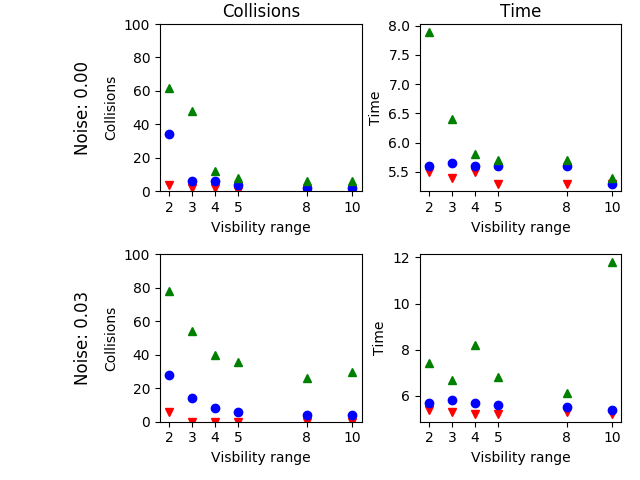

In [32]:
# Plot of min, median and max time taken to get to the goal, 
# divided up by noise in the system and mode of operation of the robots
fig, axes = plt.subplots(2,2)
outsideX = ["Collisions", "Time"]
outsideY = ["Noise: %.2f" % n for n in [0.0,0.03] ]
pad = 5 # in points
for ax, col in zip(axes[0], outsideX):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')
for ax, row in zip(axes[:,0], outsideY):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center', rotation='vertical')
plt.setp(axes[:,0], xlabel='Visbility range', ylabel='Collisions')
plt.setp(axes[:,1], xlabel='Visbility range', ylabel='Time') 
for n in range(len(noise_values_visibility)):
    if n % 2 != 1:
        continue
    data = visibility_output[n]
    mine = []
    med = []
    maxe = []
    # Time plots
    for m in range(len(visibility)):
        val = data[m]
        mine.append(np.amin(val, axis=0)[0] / 10.0)
        med.append(np.median(val, axis=0)[0]/ 10.0)
        maxe.append(np.amax(val, axis=0)[0]/ 10.0)
    axes[n/2][1].set_xticks(visibility)
    axes[n/2][1].plot(visibility, mine, 'rv', visibility, med, 'bo', visibility, maxe, 'g^')
    mine = []
    med = []
    maxe = []
    # Collision plots
    for m in range(len(visibility)):
        val = data[m]
        mine.append(np.amin(val, axis=0)[1])
        med.append(np.median(val, axis=0)[1])
        maxe.append(np.amax(val, axis=0)[1])
    axes[n/2][0].set_xticks(visibility)
    axes[n/2][0].set_ylim([0.0,100.0])
    axes[n/2][0].plot(visibility, mine, 'rv', visibility, med, 'bo', visibility, maxe, 'g^')


fig.tight_layout()
# tight_layout doesn't take these labels into account. We'll need 
# to make some room. These numbers are are manually tweaked. 
# You could automatically calculate them, but it's a pain.
fig.subplots_adjust(left=0.25, top=0.95)
fig.savefig('collisions_and_time_over_visibility_and_noise.eps', bbox_inches='tight',  format='eps', dpi=300)
plt.show()